In [1]:
import supy as sp
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from gr_comp_plot import supy_plot, df_comp

In [2]:
# Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
path_runcontrol = "/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml"
path_runcontrol

siteselect = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/SUEWS_SiteSelect.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 1,
        index_col=0,)

#siteselect

# Ladda in inställningarna i runcontrol och SiteSelect i SuPy som en DataFrame
df_state_init = sp.init_supy(path_runcontrol)

#df_state_init.loc[1]

# Grid df_state_init, se ovan. Fler Grids kan användas
grid = df_state_init.index[0] 


forcing_2017 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2017_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

forcing_2018 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2018_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

#sp.load_forcing_grid sätter Datetime som index på forcing data, samst läser in all forcing data!

df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

#sp.check för kolla så att forcing funkar
sp.check_forcing(df_forcing)
#df_forcing

2021-04-08 09:16:52,753 - SuPy - INFO - All cache cleared.
2021-04-08 09:16:57,116 - SuPy - INFO - All cache cleared.
2021-04-08 09:17:02,879 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-04-08 09:17:12,890 - SuPy - INFO - All checks for `df_forcing` passed!


In [3]:

#df_state_init = sp.init_supy(path_runcontrol)
#df_forcing = sp.load_forcing_grid(path_runcontrol, 1)

#base_roof = df_state_init.copy().loc[1] # Base scenario 0% Green roof
#green_roof= df_state_init.copy().loc[2] # Green Roof scenario 100%

## Scenario 75% Green Roof
#df_state_init.loc[3] = green_roof.copy()
#df_state_init.loc[3].storedrainprm.iloc[15] = 0.05
#df_state_init.loc[3].storedrainprm.iloc[22] = 2

#df_state_init.loc[4] = green_roof.copy()
#df_state_init.loc[4].storedrainprm.iloc[15] = 1
#df_state_init.loc[4].storedrainprm.iloc[22] = 3

#df_state_init.loc[5] = green_roof.copy()
#df_state_init.loc[5].storedrainprm.iloc[15] = 2
#df_state_init.loc[5].storedrainprm.iloc[22] = 10

#df_state_init.loc[5] = green_roof.copy()
#df_state_init.loc[6].storedrainprm.iloc[15] = 10
#df_state_init.loc[6].storedrainprm.iloc[22] = 100

#df_state_init.loc[4].storedrainprm.iloc[15] =  #drainagecoef1 i nonveg
#df_state_init.loc[4].storedrainprm.iloc[22] =  #drainagecoef2 i nonveg
# df_state_init.loc[4] = gr_recalc(df_state_init.loc[4], base_roof, green_roof, .25, .75)

## Scenario 50% Green Roof
#df_state_init.loc[5] = green_roof.copy()
#df_state_init.loc[5] = gr_recalc(df_state_init.loc[5], base_roof, green_roof, .50, .50)

## Scenario 25% green Roof
#df_state_init.loc[6] = green_roof.copy()
#df_state_init.loc[6] = gr_recalc(df_state_init.loc[6], base_roof, green_roof, .75, .25)

## Scenario 10% green Roof
#df_state_init.loc[7]= green_roof.copy()
#df_state_init.loc[7] = gr_recalc(df_state_init.loc[7], base_roof, green_roof, .90, .10)


In [4]:
#df_state_init.loc[4].alb[1]

In [5]:
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

base    = df_output.loc[1].SUEWS # 0% Green Roof
gr_100  = df_output.loc[2].SUEWS # 100% Green Roof

# 75% Green Roof
gr_75   = base.copy()
gr_75[:]   = np.average([base,gr_100],weights=[0.25, 0.75],axis=0)

# 50% Green Roofgr_50   = base.SUEWS.copy()
gr_50   = base.copy()
gr_50[:]   = np.average([base,gr_100],weights=[0.50, 0.50],axis=0)

# 25% Green Roofgr_25   = base.SUEWS.copy()
gr_25   = base.copy()
gr_25[:]   = np.average([base,gr_100],weights=[0.75, 0.25],axis=0)

# 10% Green Roofgr_10   = base.SUEWS.copy()
gr_10   = base.copy()
gr_10[:]   = np.average([base,gr_100],weights=[0.90, 0.10],axis=0)

# Kville Green Roofgr_Kville   = base.SUEWS.copy()
gr_kville   = base.copy()
gr_kville[:]   = np.average([base,gr_100],weights=[0.74, 0.26],axis=0)

 

#df_merge = pd.concat([base, gr_100, gr_75, gr_50, gr_25, gr_10],axis=1,join='inner',keys=['base','gr_99','gr_75','gr_50','gr_25','gr_10']).swaplevel(0,-1,axis=1).sort_index(axis=1)

2021-04-08 09:17:13,062 - SuPy - INFO - ====================
2021-04-08 09:17:13,068 - SuPy - INFO - Simulation period:
2021-04-08 09:17:13,072 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2021-04-08 09:17:13,077 - SuPy - INFO -   End: 2018-12-31 23:00:00
2021-04-08 09:17:13,083 - SuPy - INFO - 
2021-04-08 09:17:13,087 - SuPy - INFO - No. of grids: 3
2021-04-08 09:17:13,090 - SuPy - INFO - SuPy is running in parallel mode
2021-04-08 09:20:28,915 - SuPy - INFO - Execution time: 195.8 s
2021-04-08 09:20:29,207 - SuPy - INFO - ====================



In [6]:
gr_100['Irr'].max()

0.0

In [7]:
#df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

#base    = df_output.loc[1] # 0% Green Roof
#gr_100  = df_output.loc[2] # 100% Green Roof
#gr_75   = df_output.loc[4] # 75% Green Roof
#gr_50   = df_output.loc[5] # 50% Green Roof
#gr_25   = df_output.loc[6] # 25% Green Roof
#gr_10   = df_output.loc[7] # 10% Green Roof

#df_output_merge_x=pd.concat([base, gr_100, gr_75, gr_50, gr_25, gr_10],axis=1,join='inner',keys=['base','gr_100','gr_75','gr_50','gr_25',#'gr_10']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

#df_merge = df_output_merge_x.SUEWS

In [8]:
list_scenario = [base, gr_100, gr_75, gr_50, gr_25, gr_10, gr_kville]
list_names = ['base','gr_99','gr_75','gr_50','gr_25','gr_10', 'gr_kville']


df_merge, df_diff = df_comp(list_scenario, list_names)

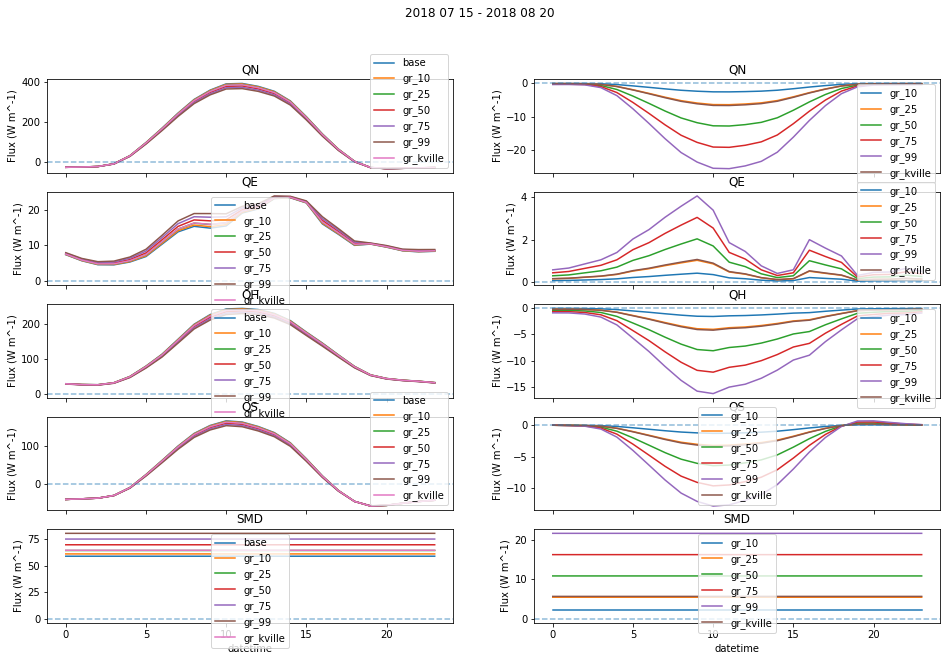

In [9]:
s = '2018 07 15'

e = '2018 08 20'

fig,axes = plt.subplots(5,2,figsize=(16,10),sharex=True)
idx = 0
fig.suptitle(s+' - '+e)

for i in ['QN','QE','QH','QS', 'SMD']:
    ax =  df_merge.loc[s:e,i].reset_index().groupby(df_merge.loc[s:e].reset_index().datetime.dt.hour).mean().plot(ax= axes[idx,0])
    ax2 = df_diff.loc[s:e,i].reset_index().groupby(df_merge.loc[s:e].reset_index().datetime.dt.hour).mean().plot(ax= axes[idx,1])
    idx=idx+1

    for j in [ax,ax2]:
        j.axhline(0, linestyle='--',alpha = 0.5)
        j.set_ylabel('Flux (W m^-1)')
        j.set_title(i)

In [49]:
s = '2018 07 18'
e = '2018 07 25'

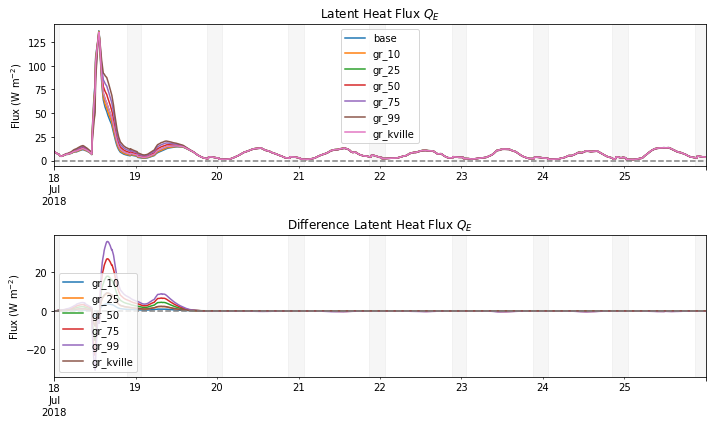

In [51]:
supy_plot('QE', df_merge, df_diff, s, e, size=(10,6))

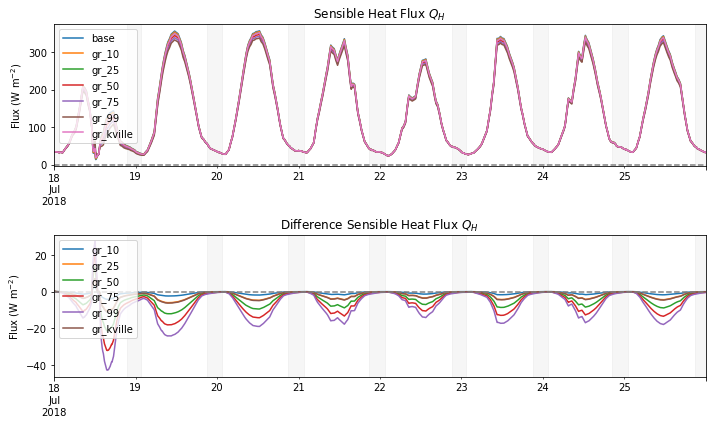

In [50]:
supy_plot('QH', df_merge, df_diff, s, e, size=(10,6))

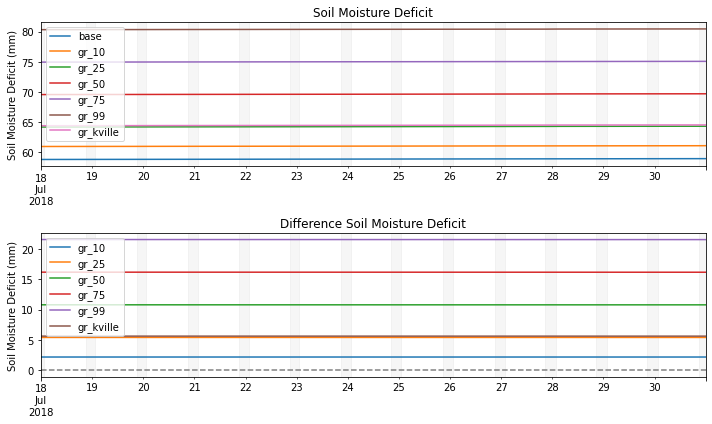

In [47]:
supy_plot('SMD', df_merge, df_diff, s, e, size=(10,6))

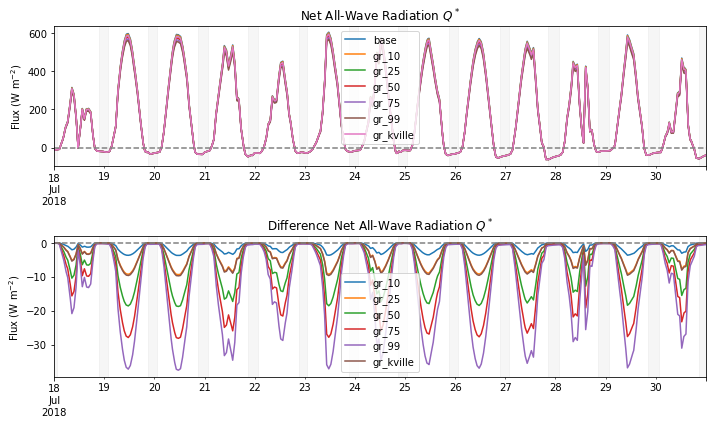

In [48]:
supy_plot('QN', df_merge, df_diff, s, e, size=(10,6))

In [15]:

#df_merge.loc[s:e,'QS'].head()

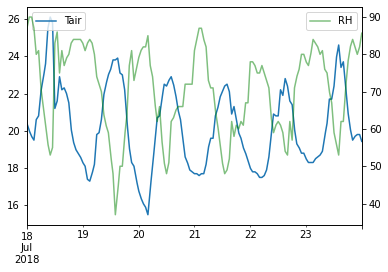

In [16]:
s = '2018 07 18'
e = '2018 07 23'
ax  =df_forcing.loc[s:e,'Tair'].plot()
ax2 = ax.twinx()
ax2  =df_forcing.loc[s:e,'RH'].plot(ax = ax2, color='g', alpha = 0.5)
ax.legend(loc='upper left')
ax2.legend()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='7a96a122-4011-4eb0-b963-12230834f76b'>)

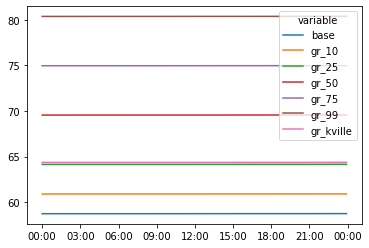

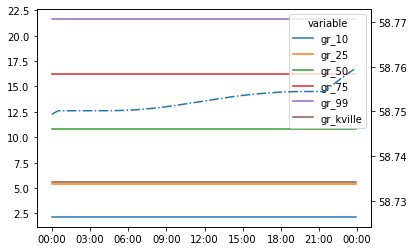

In [17]:
s = '2018 07 18'
e = '2018 07 23'
sp.util.plot_day_clm(df_merge.loc[s:e,'SMD'])
sp.util.plot_day_clm(df_merge.loc[s:e,'SMD'],show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='0e8065de-3579-4713-9996-bf1f157a0490'>)

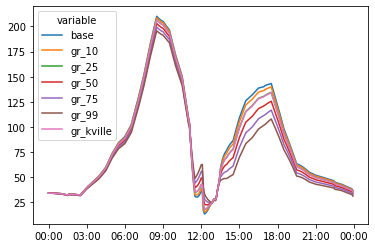

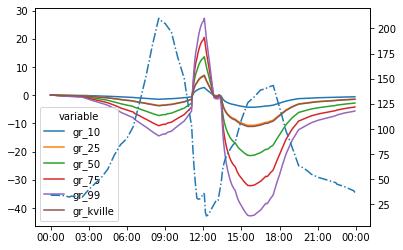

In [18]:
s = '2018 07 18'
e = '2018 07 18'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='6396e1a2-8b9d-49e3-a431-9acbe96d38cd'>)

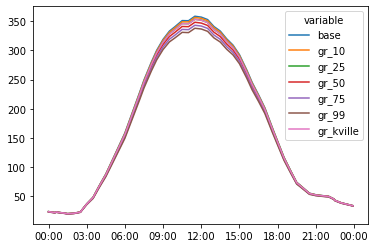

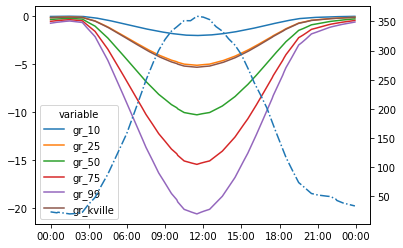

In [19]:
s = '2018 07 02'
e = '2018 07 02'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='13c68edf-0189-4b16-9b80-fae4490347ce'>)

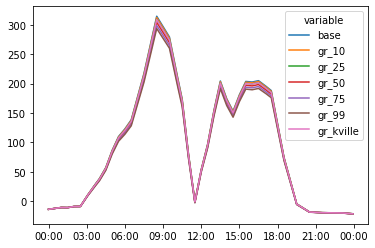

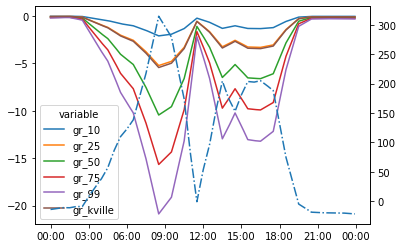

In [20]:
s = '2018 07 18'
e = '2018 07 18'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QN'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QN'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='7cdef57b-f053-429c-9627-21fa9517e8ba'>)

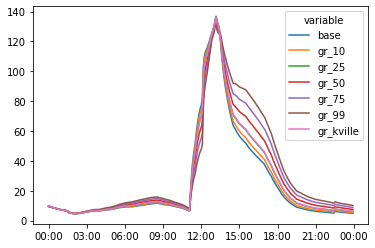

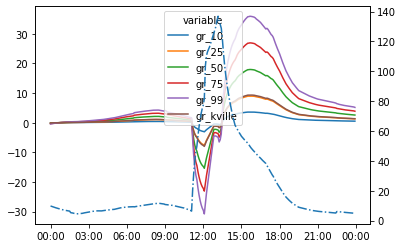

In [21]:
s = '2018 07 18'
e = '2018 07 18'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='886932c5-ed1d-4e7b-a19d-2a898a35bb8a'>)

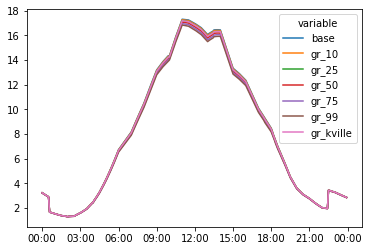

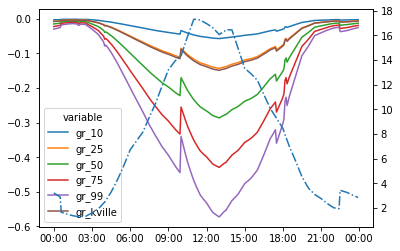

In [22]:
s = '2018 07 02'
e = '2018 07 02'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'], show_dif =True, col_ref =('base'))

<AxesSubplot:xlabel='datetime'>

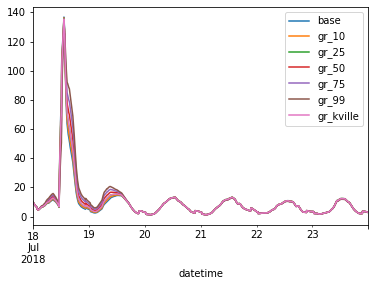

In [23]:
s = '2018 07 18'
e = '2018 07 23'
df_merge.loc[s:e, 'QE'].plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='e8a3e9f0-7fa3-4d0f-9530-8d47bf49eaf2'>)

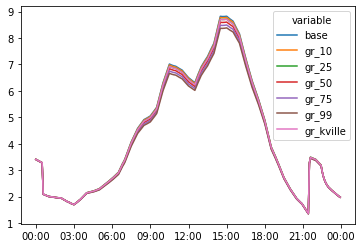

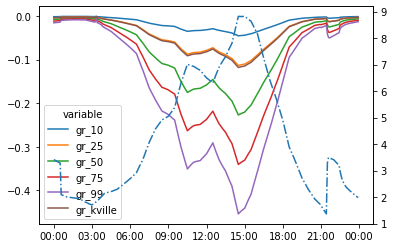

In [24]:
s = '2018 07 15'
e = '2018 07 15'

sp.util.plot_day_clm(df_merge.loc[s:e,'QE'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QE'],show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='0772a1be-c219-48ca-8a2f-1bc72842512d'>)

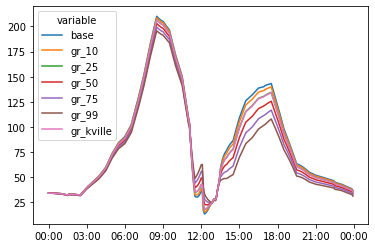

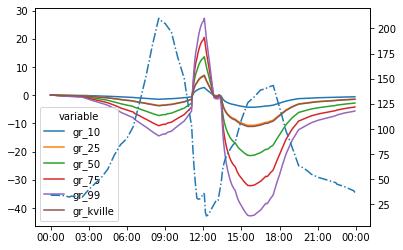

In [25]:
s = '2018 07 18'
e = '2018 07 18'
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'],show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='b46c6fe1-3cbb-4501-89bd-066e21cb6e07'>)

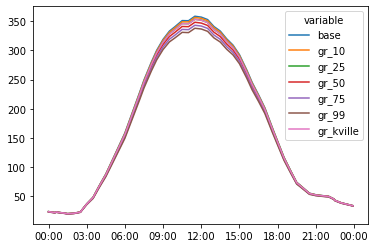

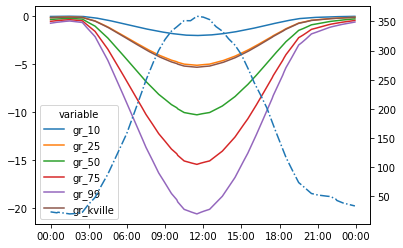

In [26]:
s = '2018 07 02'
e = '2018 07 02'
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'],show_dif =True, col_ref =('base'))

<AxesSubplot:xlabel='datetime'>

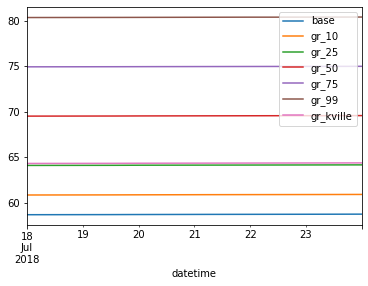

In [27]:
s = '2018 07 18'
e = '2018 07 23'
df_merge.loc[s:e, 'SMD'].plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='381d8391-7794-4406-9158-27c1126cc7d4'>)

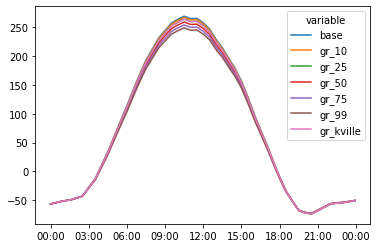

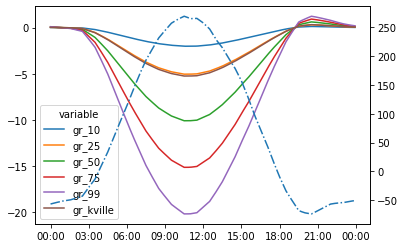

In [28]:
s = '2018 07 02'
e = '2018 07 02'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='4dc9d935-64fa-4e09-ad06-6f6c407feafb'>)

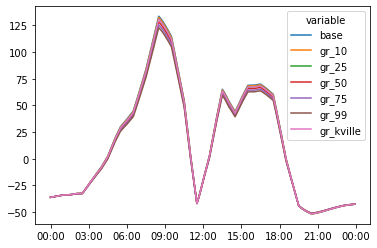

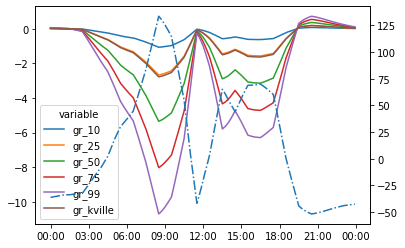

In [29]:
s = '2018 07 18'
e = '2018 07 18'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='8d67e1d6-f431-47e8-ab36-d6a97be3b6f0'>)

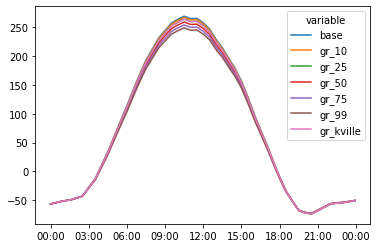

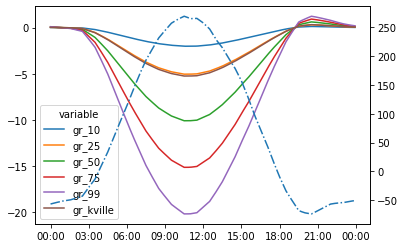

In [30]:
s = '2018 07 02'
e = '2018 07 02'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'], show_dif =True, col_ref =('base'))